# Projeto 5: Classificação de texto e analise de Sentimentos

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [102]:
import seaborn as sns

In [2]:
plt.style.use('seaborn')

In [4]:
alexa = pd.read_csv('datasets/amazon-alexa.tsv', sep='\t')
alexa.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [8]:
alexa = alexa.drop('date', axis=1)


In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(alexa.drop(['feedback'], axis=1), alexa['feedback'], 
                                                    test_size=.3, random_state=21)

In [42]:
from sklearn.preprocessing import OneHotEncoder

ohe_variation = OneHotEncoder()
variation_train_array_dummy = ohe_variation.fit_transform(X_train['variation'].values.reshape(-1, 1))

variation_test_array_dummy = ohe_variation.transform(X_test['variation'].values.reshape(-1, 1))

variation_train_array_dummy = pd.DataFrame(columns=ohe_variation.get_feature_names(),
                                           data=variation_train_array_dummy.toarray())

variation_test_array_dummy = pd.DataFrame(columns=ohe_variation.get_feature_names(),
                                           data=variation_test_array_dummy.toarray())



In [44]:
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS, TfidfVectorizer

In [69]:
ct_vect_review = CountVectorizer(stop_words=ENGLISH_STOP_WORDS)
reviews_train_vect = ct_vect_review.fit_transform(X_train['verified_reviews'])

reviews_test_vect = ct_vect_review.transform(X_test['verified_reviews'])

reviews_train_vect = pd.DataFrame(columns=ct_vect_review.get_feature_names(), 
                                  data = reviews_train_vect.toarray())

reviews_test_vect = pd.DataFrame(columns=ct_vect_review.get_feature_names(), data=reviews_test_vect.toarray())


In [70]:
X_train_final  =  pd.concat([reviews_train_vect, variation_train_array_dummy], axis=1)
X_test_final  =  pd.concat([reviews_test_vect, variation_test_array_dummy], axis=1)

In [72]:
X_test_final.shape, X_train_final.shape

((945, 3234), (2205, 3234))

In [74]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train_final, y_train)
pred = rfc.predict(X_test_final)

In [91]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [77]:
confusion_matrix(y_test, pred)

array([[ 21,  60],
       [ 15, 849]])

In [92]:
accuracy_score(y_test, pred)

0.9206349206349206

In [93]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.58      0.26      0.36        81
           1       0.93      0.98      0.96       864

    accuracy                           0.92       945
   macro avg       0.76      0.62      0.66       945
weighted avg       0.90      0.92      0.91       945



# criando o modelo

In [123]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=400, activation='relu', input_shape=(3234,)))
model.add(tf.keras.layers.Dense(units=400, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(units=800, activation='relu'))
model.add(tf.keras.layers.Dense(units=1200, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(units=400, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))



In [124]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 400)               1294000   
_________________________________________________________________
dense_16 (Dense)             (None, 400)               160400    
_________________________________________________________________
dropout_2 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 800)               320800    
_________________________________________________________________
dense_18 (Dense)             (None, 1200)              961200    
_________________________________________________________________
dropout_3 (Dropout)          (None, 1200)              0         
_________________________________________________________________
dense_19 (Dense)             (None, 400)              

In [125]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [126]:
epochs_hist = model.fit(X_train_final, y_train, epochs=30)

Epoch 1/30
69/69 [==============================] - 1s 14ms/step - loss: 0.2825 - accuracy: 0.9116
Epoch 2/30
69/69 [==============================] - 1s 14ms/step - loss: 0.0914 - accuracy: 0.9624
Epoch 3/30
69/69 [==============================] - 1s 14ms/step - loss: 0.0358 - accuracy: 0.9887
Epoch 4/30
69/69 [==============================] - 1s 14ms/step - loss: 0.0210 - accuracy: 0.9932
Epoch 5/30
69/69 [==============================] - 1s 14ms/step - loss: 0.0130 - accuracy: 0.9959
Epoch 6/30
69/69 [==============================] - 1s 14ms/step - loss: 0.0114 - accuracy: 0.9955
Epoch 7/30
69/69 [==============================] - 1s 14ms/step - loss: 0.0092 - accuracy: 0.9959
Epoch 8/30
69/69 [==============================] - 1s 14ms/step - loss: 0.0127 - accuracy: 0.9959
Epoch 9/30
69/69 [==============================] - 1s 14ms/step - loss: 0.0106 - accuracy: 0.9968
Epoch 10/30
69/69 [==============================] - 1s 14ms/step - loss: 0.0087 - accuracy: 0.9955
Epoch 11/

In [127]:
pred_tf = model.predict(X_test_final)
pred_tf = (pred_tf > 0.5)

In [128]:
cm_tf = confusion_matrix(y_test, pred_tf)
cm_rfc = confusion_matrix(y_test, pred)

In [129]:
cm_rfc

array([[ 21,  60],
       [ 15, 849]])

In [130]:
cm_tf

array([[ 29,  52],
       [ 14, 850]])

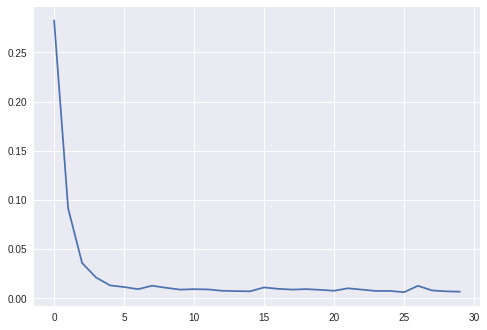

In [131]:
plt.plot(epochs_hist.history['loss'])